In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris_raw = load_iris(as_frame=True)
iris = iris_raw.frame.rename(columns={
    'sepal length (cm)':'Sepal.Length',
    'sepal width (cm)':'Sepal.Width',
    'petal length (cm)':'Petal.Length',
    'petal width (cm)':'Petal.Width'
})
iris['Species'] = iris_raw.target_names[iris_raw.target]

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   target        150 non-null    int64  
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
X = iris.drop(columns=["Species"]).to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Klasterlərin optimal sayını tapmaq

In [7]:
wcss=[]
# the sum of the squared distance between each point and the centroid in a cluster

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[750.0,
 259.861704965023,
 162.17107855654797,
 137.0390983301234,
 109.96104402468643,
 86.23549698815884]

Text(0, 0.5, 'WCSS')

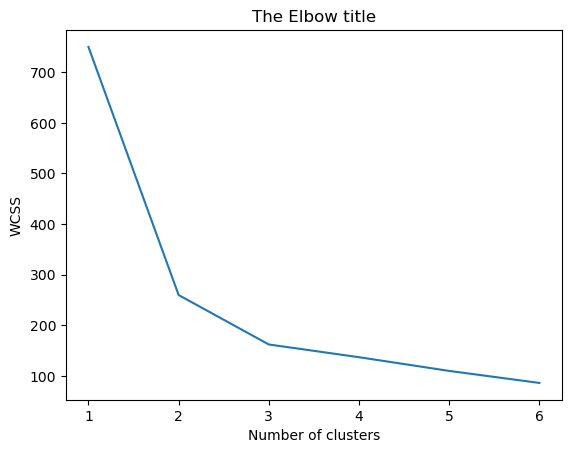

In [8]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## K-Means Klasterləşmə modeli

In [10]:
kmeans = KMeans(n_clusters=2) # 2 & 3
kmeans

KMeans(n_clusters=2)

In [11]:
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

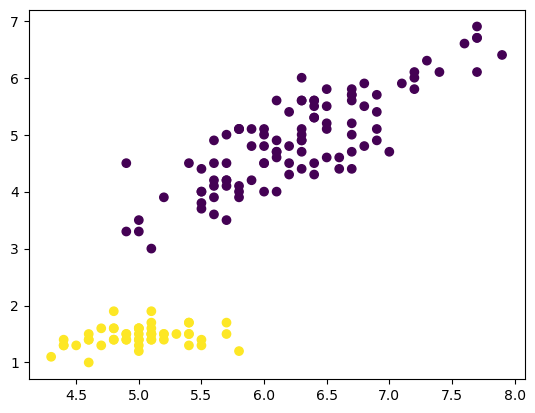

In [12]:
# Nəticəni vizuallaşdırmaq

plt.scatter(iris['Sepal.Length'],iris['Petal.Length'],
            c=y_kmeans)